In [1]:
%%html
<style>
div.output_area pre {
    white-space: pre;
    word-wrap: normal;
}
.container { 
    width:100% !important; 
}
</style>

In [2]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import hinge_loss
from sklearn import metrics
import datetime
from datetime import date

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [5]:
data_full = pd.read_csv('./credictCard_fraud/creditcard.csv')

In [6]:
data_full['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
data_test = pd.read_csv("./credictCard_fraud/data_test_sample.csv")
X_test = data_test.drop('class',axis=1)
y_test = data_test['class']

In [15]:
data_train = pd.read_csv('./credictCard_fraud/data_train_sample.csv')
X_train = data_train.drop('class',axis =1)
y_train = data_train['class']

In [20]:
svclassifier = svm.SVC(kernel='rbf')

In [22]:
start = datetime.datetime.now()
svclassifier.fit(X_train, y_train)
end = datetime.datetime.now()
y_pred = svclassifier.predict(X_test)
info_train= {'size': len(X_train),'accuracy':metrics.accuracy_score(y_test,y_pred).tolist(),'time_train': (end-start).total_seconds(),'f1_score':f1_score(y_test,y_pred),'precison':precision_score(y_test,y_pred),'recall':recall_score(y_test,y_pred) }
print(info_train)

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'recall': 0.7669902912621359, 'size': 16000, 'f1_score': 0.8633879781420766, 'time_train': 1.47652, 'precison': 0.9875, 'accuracy': 0.99375}


In [23]:
svclassifier = svm.SVC(kernel='poly')
start = datetime.datetime.now()
svclassifier.fit(X_train, y_train)
end = datetime.datetime.now()
y_pred = svclassifier.predict(X_test)
info_train= {'size': len(X_train),'accuracy':metrics.accuracy_score(y_test,y_pred).tolist(),'time_train': (end-start).total_seconds(),'f1_score':f1_score(y_test,y_pred),'precison':precision_score(y_test,y_pred),'recall':recall_score(y_test,y_pred) }
print(info_train)

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'recall': 0.8155339805825242, 'size': 16000, 'f1_score': 0.8888888888888887, 'time_train': 0.732902, 'precison': 0.9767441860465116, 'accuracy': 0.99475}


In [ ]:
svclassifier = svm.SVC(kernel='linear')
start = datetime.datetime.now()
svclassifier.fit(X_train, y_train)
end = datetime.datetime.now()
y_pred = svclassifier.predict(X_test)
info_train= {'size': len(X_train),'accuracy':metrics.accuracy_score(y_test,y_pred).tolist(),'time_train': (end-start).total_seconds(),'f1_score':f1_score(y_test,y_pred),'precison':precision_score(y_test,y_pred),'recall':recall_score(y_test,y_pred) }
print(info_train)

Confusion matrix, without normalization
[[3896    1]
 [  24   79]]


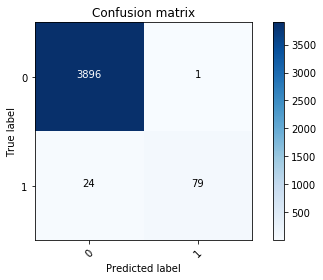

In [19]:
y_pred = svclassifier.predict(X_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

In [21]:
87/(88)

0.9886363636363636

## Train full data

In [7]:
# start = datetime.datetime.now()
# svclassifier.fit(X_train, y_train)
# end = datetime.datetime.now()
# y_pred = svclassifier.predict(X_test)
# info_train= {'size': len(X_train), 'accuracy':metrics.accuracy_score(y_test,y_pred).tolist(),'time_train': (end-start).total_seconds() }
# result.append(info_train)

In [8]:
# y_pred = svclassifier.predict(X_test)
# cnf_matrix = confusion_matrix(y_test,y_pred)
# class_names = ['male','female']
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix, without normalization')
# plt.show()

In [9]:
pathname ='./credictCard_fraud/'
list_file = []
for i in range(1,61):
    list_file.append(pathname +'coreset'+str(i)+'.csv')

In [19]:
i = 1
result = []
for file in list_file:
    global coreset,y_coreset,X_coreset
    coreset = pd.read_csv(file,header=None)
    y_coreset = coreset[29]
    X_coreset = coreset.drop(29, axis=1)
    svclassifier = svm.SVC(kernel='poly')
    start = datetime.datetime.now()
    svclassifier.fit(X_coreset, y_coreset)
    end = datetime.datetime.now()
    y_pred = svclassifier.predict(X_test)
    info_train= {'size': len(X_coreset),'accuracy':metrics.accuracy_score(y_test,y_pred).tolist(),'time_train': (end-start).total_seconds(),'f1_score':f1_score(y_test,y_pred),'precison':precision_score(y_test,y_pred),'recall':recall_score(y_test,y_pred) }
    result.append(info_train)

In [20]:
import csv
with open("./credictCard_fraud/result_poly","w",newline="") as f:  # python 2: open("output.csv","wb")
    title = "size,accuracy,time_train,f1_score,precison,recall".split(",") # quick hack
    cw = csv.DictWriter(f,title,delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    cw.writeheader()
    cw.writerows(result)

In [18]:
import csv
with open("./creditCard/result_rbf","w",newline="") as f:  # python 2: open("output.csv","wb")
    title = "size,accuracy,time_train".split(",") # quick hack
    cw = csv.DictWriter(f,title,delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    cw.writeheader()
    cw.writerows(result)

In [38]:
size=[]
accuracy=[]
time_train =[]
for data in result:
    size.append(data['size'])
    accuracy.append(data['accuracy']*100)
    time_train.append(data['time_train'])
df_train = pd.DataFrame([size[:-1],accuracy[:-1]]).T
    

In [39]:
df_train.columns = ['size','accuracy']

In [40]:
result[-1]

{'size': 30000, 'accuracy': 0.7715, 'time_train': 22726.641487}

In [41]:
df_train['full_data']= result[-1]['accuracy']*100

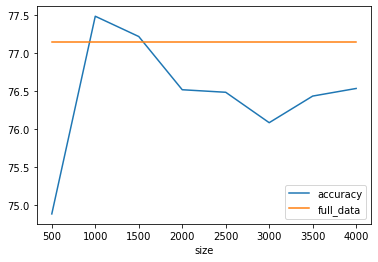

In [42]:
df_train.sort_values(by='size',ascending=False).plot.line(x='size',y=['accuracy','full_data'])

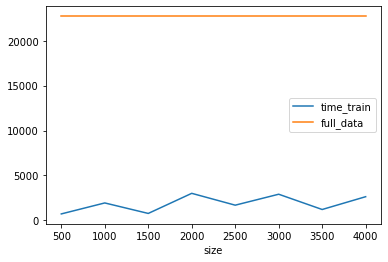

In [43]:
df_train = pd.DataFrame([size[:-1],time_train[:-1]]).T
df_train.columns = ['size','time_train']
df_train['full_data']= result[-1]['time_train']
df_train.sort_values(by='size',ascending=False).plot.line(x='size',y=['time_train','full_data'])